In [4]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [60]:
quandl.ApiConfig.api_key = 'zZzhwTNJ1Z8SxApaAd8K'

df = quandl.get("WIKI/AMZN")
df = df[['Adj. Close']]
df

,Adj. Close
Date,
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635833
1997-05-21,1.427500
1997-05-22,1.395833
...,...
2018-03-21,1581.860000
2018-03-22,1544.100000
2018-03-23,1495.560000


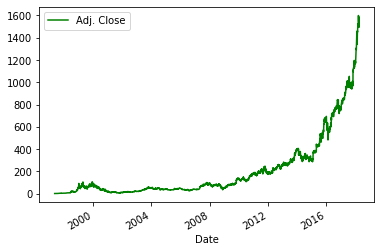

In [61]:
df['Adj. Close'].plot(color='g')
plt.legend(loc='upper left')
plt.show()

In [91]:
forecast = 30
df['Prediction'] = df[['Adj. Close']]

X = np.array(df.drop(['Prediction'], 1))
X = preprocessing.scale(X)

X_forecast = X[-forecast:]
X = X[:-forecast]

y = np.array(df['Prediction'])
y = y[forecast: ]

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression()
clf.fit(X_train, y_train)

confidence = clf.score(X_test, y_test)

forecast_predicted = clf.predict(X_forecast)
print(forecast_predicted)

[1497.89401006 1536.67148546 1548.03729721 1534.16697419 1555.03082658
 1570.49299999 1572.4456698  1588.61886972 1611.91294703 1601.33244814
 1601.83122792 1581.6677897  1588.88417812 1613.67459479 1628.56370207
 1636.3743813  1643.65444373 1672.33958768 1693.0336427  1682.19844774
 1685.19112647 1675.9796189  1664.6880935  1636.30009495 1680.42618764
 1675.49145145 1635.41927107 1583.90699258 1647.89937809 1585.48823063]


(736445.0, 736810.0)

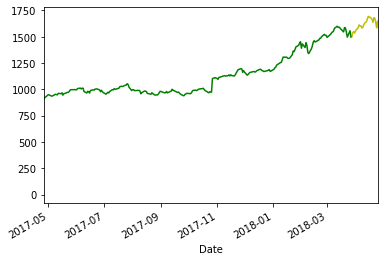

In [95]:
dates = pd.date_range(start="2018-03-28", end="2018-04-26")
plt.plot(dates, forecast_predicted, color='y')
df['Adj. Close'].plot(color='g')
plt.xlim(xmin=datetime.date(2017,4,26), xmax=datetime.date(2018, 4, 26))